In [1]:
%matplotlib inline
from prada_bayes_opt import PradaBayOptFBO
import numpy as np
import matplotlib.pyplot as plt

from prada_bayes_opt import visualization
import random
from prada_bayes_opt import functions
import warnings

import sys

warnings.filterwarnings("ignore")

We will select a (blackbox) function for optimization. such as

branin(),

sincos(),

dropwave(),

hartman_3d(),

hartman_6d(),

alpine2(input_dim=5),

alpine2(input_dim=10),

gSobol(a=np.array([1,1,1,1,1])),

gSobol(a=np.array([1,1,1,1,1,1,1,1,1,1]))

In [2]:
# use branin function
myfunction=functions.branin()          #2D

#myfunction=functions.hartman_3d()

print "======================================================================="
print "You are selecting function {:s} D={:d}".format(myfunction.name,myfunction.input_dim)

You are selecting function branin D=2


Ploting the selected function

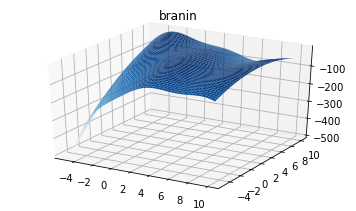

In [3]:
visualization.plot_original_function(myfunction)


In [4]:
gp_params = {'theta':1,'noise_delta':0.1,'MaxIter':10*myfunction.input_dim}

# create an empty object for BO
acq_func={}
acq_func['name']='ei'
acq_func['kappa']=2
acq_func['dim']=myfunction.input_dim

Create an initial bound and also the limit bound

In [5]:
# Create an array with parameters bounds
if isinstance(myfunction.bounds,dict):
    # Get the name of the parameters    
    bounds0 = []
    for key in myfunction.bounds.keys():
        bounds0.append(myfunction.bounds[key])
    bounds0 = np.asarray(bounds0)
else:
    bounds0=np.asarray(myfunction.bounds)

gap=bounds0[:,1]-bounds0[:,0]

b_init_lower=np.asarray([0,20])
b_init_upper=np.asarray([15,50])
b_limit_lower=np.asarray([-50,-70])
b_limit_upper=bounds0[:,1]+5*gap[1]

Create an object

In [6]:
bo=PradaBayOptFBO(gp_params,f=myfunction.func, b_init_lower=b_init_lower,b_init_upper=b_init_upper
     ,b_limit_lower=b_limit_lower, b_limit_upper=b_limit_upper, acq=acq_func,opt_toolbox='scipy')

bo.init(gp_params,n_init_points=3*myfunction.input_dim)

Print the bound

In [7]:
print "lower_bound=",
print bo.bounds[:,0]
print "upper_bound",
print bo.bounds[:,1]

lower_bound= [ 0 20]
upper_bound [15 50]


Number of iteration


In [8]:
NN=10*myfunction.input_dim

In [9]:
# run the first iteration
bo.run_FBO(gp_params)

print the new bound


In [10]:
print "lower_bound=",
print bo.bounds[:,0]
print "upper_bound",
print bo.bounds[:,1]

lower_bound= [ -7.44509428  20.        ]
upper_bound [ 15.  50.]


We can see that the lower bound in the second dimension has decreased from 20 to 18.26.

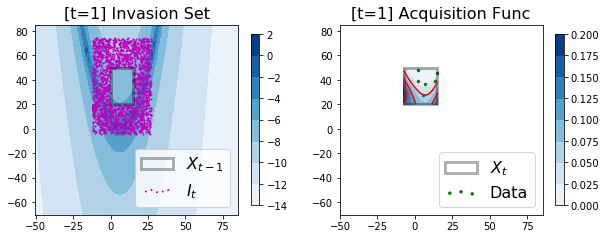

In [11]:
# plot
visualization.plot_bo_2d_FBO(bo,myfunction)


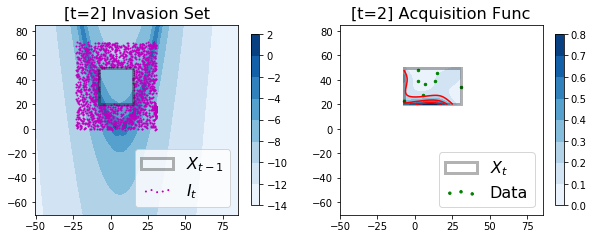

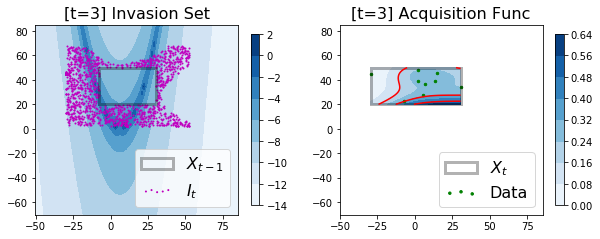

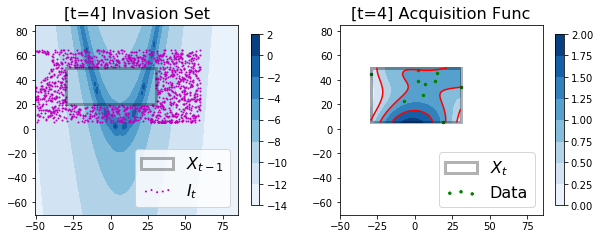

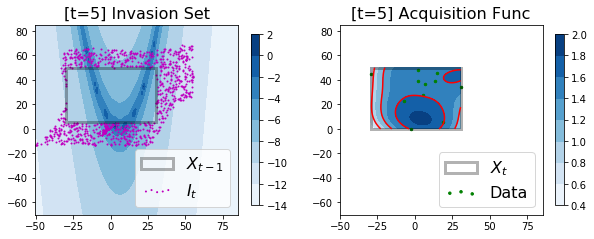

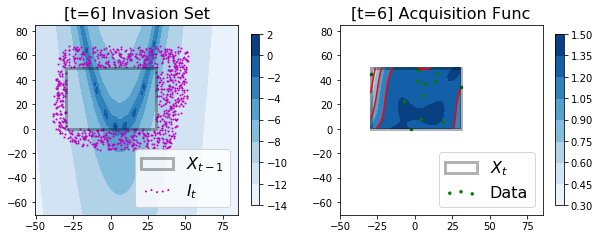

In [12]:
# continue FBO for a few iterations
for index in range(0,5):
    bo.run_FBO(gp_params)
    visualization.plot_bo_2d_FBO(bo,myfunction)

In [13]:
# print the new bound
print "lower_bound=",
print bo.bounds[:,0]
print "upper_bound",
print bo.bounds[:,1]

lower_bound= [ 0.         -3.64559044]
upper_bound [ 15.  50.]


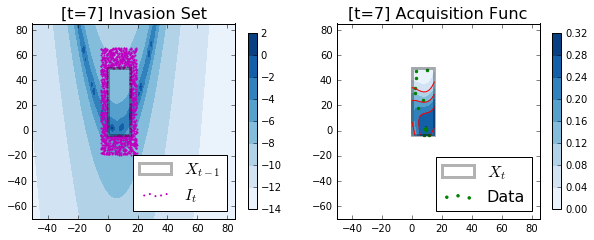

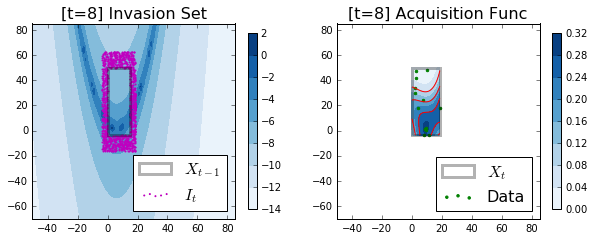

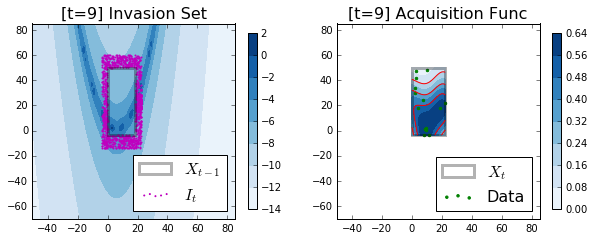

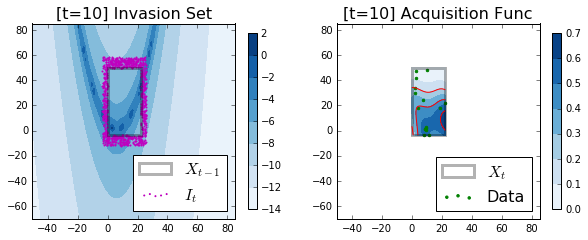

In [14]:
# continue BUBO for a few more iterations
for index in range(0,4):
    bo.run_BUBO(gp_params)
    visualization.plot_bo_2d_BUBO(bo,myfunction)

In [13]:
# print the new bound
print "lower_bound=",
print bo.bounds[:,0]
print "upper_bound",
print bo.bounds[:,1]

lower_bound= [ -2.94929983e+01   1.04837576e-02]
upper_bound [ 30.4940398  50.       ]


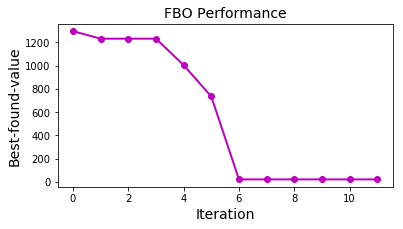

In [15]:
# plot the performance - Best Found Value
fig=plt.figure(figsize=(6, 3))
myYbest=[bo.Y_original[:idx+1].max()*-1 for idx,val in enumerate(bo.Y_original)]
plt.plot(xrange(len(myYbest)),myYbest,linewidth=2,color='m',linestyle='-',marker='o')
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Best-found-value',fontsize=14)
plt.title('FBO Performance',fontsize=14)